## Esercitazione del 20 Maggio 2025

# Esercizio 1

Scrivere un codice Python per l'addestramento di una rete MLP  per risolvere un problema di regressione. La rete ha la seguente architettura: un layer di input formato da un solo neurone e un layer di output formato da un solo neurone.

**Algoritmo di addestramento:**

Utilizzeremo l'algoritmo di ottimizzazione Batch Gradient Descent con passo di apprendimento learning_rate per aggiornare i pesi della rete durante l'addestramento.

## Descrizione del problema:

Consideriamo un dataset di coppie (x, y), dove x è un valore di input scalare e y è il valore di output desiderato. La rete MLP deve apprendere la relazione tra x e y in modo da poter prevedere y per nuovi valori di x.

-   Implementare la  funzione forward_propagation che calcola    l'output della rete per un dato input x.
-   Implementare la  funzione backward_propagation per calcolare il gradiente della funzione di perdita rispetto ai pesi della rete ed aggiornare i pesi con il metodo del  Gradient Descent.
       

    

Addestrare la rete:

-     Caricare un dataset di coppie (x, y).
-     Inizializzare i pesi della rete con valori casuali.
-     Iterare su un numero definito di epoche:
        Per ogni campione di training (x, y):
          -  Calcolare l'output previsto y_pred
             (forward_propagation).
        Calcolare l'errore MSE (np.mean(0.5*(y_pred - y)**2)
         -Calcolare il gradiente della funzione Costo
           rispetto ai pesi (backward_propagation).
         -Aggiornare i pesi della rete utilizzando
          l'algoritmo di Batch Gradient Descent.

   
-    Sperimentare con diversi valori di learning rate e numero di
     epoche per ottimizzare le prestazioni della rete.

-    Visualizzare il grafico della Cost-Function in funzione delle epoche

-    Usa la funzione di attivazione RELU.

Valutare le prestazioni della rete:
-    Su un set di dati di test e  Visualizzare i risultati ottenuti.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
seed=11
random.seed(seed)
np.random.seed(seed)

def relu(x):
  """

  Argomenti:
    x: Valore di input.

  Restituisce:
    Valore di output della funzione ReLU.
  """
  return np.where(x >= 0, x, 0)

def relu_derivative(x):
  """
  Funzione per calcolare la derivata vettoriale della funzione ReLU.

  Argomenti:
    x: Array di input.

  Restituisce:
    Array contenente la derivata della funzione ReLU per ogni elemento in x.
  """
  return np.where(x >= 0, 1, 0)


In [2]:
def forward_propagation(x,w,bias):#input node, weight
    a=w*x+bias
    z=relu(a)
    return z,a

In [3]:
def backward_propagation(y_prediction, y,x,a,w,bias,learning_rate): #prediction and etiquette
    delta_1=(y_prediction-y)-relu_derivative(a)
    w=w-learning_rate*np.sum(delta_1*x)/x.shape[0]
    bias=bias-learning_rate*np.sum(delta_1)/x.shape[0]

    return w,bias

In [4]:
#cost function
def mse(y_prediction,y_true):
    return np.mean(0.5*(y_prediction-y_true)**2)

In [5]:
# example data
x=np.linspace(0.0,10,50)
y=2*x+5+0.4*np.random.normal(0,2,50)

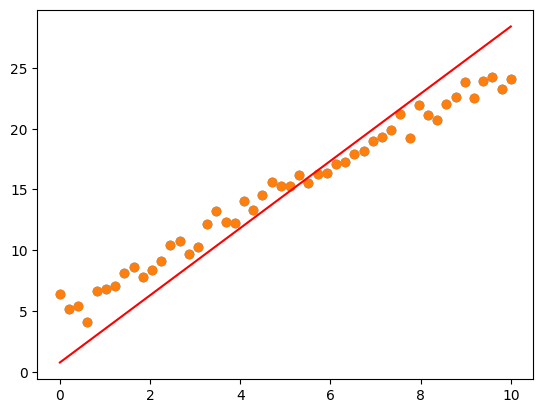

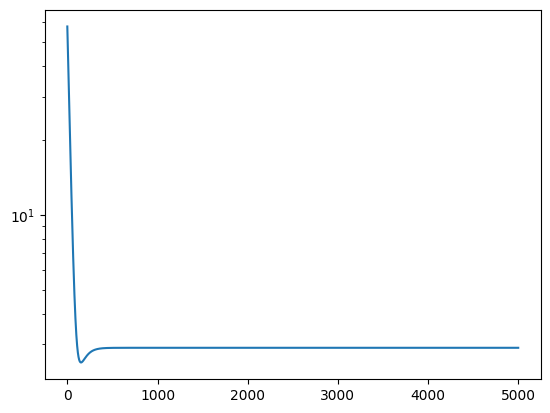

In [6]:
epochs=5000
learning_rate=0.0005
v_loss=[]
# initialize weigths and bias
w=np.random.rand()
bias=np.random.rand()

for epoch in range(epochs):
    # forward propagation
    y_pred,a=forward_propagation(x,w,bias)
    # calculate cost function
    loss=mse(y_pred,y)
    v_loss.append(loss)

    # update weights and bias with batch gradient descent method
    w,b=backward_propagation(y_pred,y,x,a,w,bias,learning_rate)

# data prediction
x_new=np.linspace(0.0,10,100)
y_pred,a=forward_propagation(x_new,w,bias)

plt.plot(x,y,'o')
plt.plot(x,y,'o',x_new,y_pred,'r-')
plt.show()
plt.semilogy(v_loss)


# Esercizio 2

Risolvere lo stesso problema cambiando l'architettura della rete:

La rete MLP avrà la seguente struttura:

    1 layer di input formato da un solo neurone che riceve il valore di x
    2 hidden layers ognuno formato da un solo neurone con funzione di attivazione ReLU
    1 layer di output formato da un solo neurone che produce il valore previsto di y

In [7]:
def forward_propagation(x,w,b):
    a1=w[0]*x+b[0]
    z1=relu(a1)
    
    a2=w[1]*x+b[1]
    z2=relu(a2)

    a3=w[2]*z2+b[2]
    z3=relu(a3)

    return z3,a1,a2,a3,z1,z2

In [10]:
def backwadrs_propagation(y_pred,y,w,b,a1,a2,a3,z1,z2,x,learning_rate,nT):
    delta_3=(y_pred-y)*relu_derivative(a3)
    delta_2=delta_3*w[2]*relu_derivative(a2)
    delta_1=delta_2*w[1]*relu_derivative(a1)

    # Update weights
    w[2]=w[2]-learning_rate*np.sum(delta_3*z2)/nT
    w[1]=w[1]-learning_rate*np.sum(delta_2*z1)/nT
    w[0]=w[0]-learning_rate*np.sum(delta_1*x)/nT

    # Update Bias
    b[2]=b[2]-learning_rate*np.sum(delta_3)/nT
    b[1]=b[1]-learning_rate*np.sum(delta_2)/nT
    b[0]=b[0]-learning_rate*np.sum(delta_1)/nT

    return w,b

In [12]:
w=np.random.randn(3)
b=np.random.randn(3)

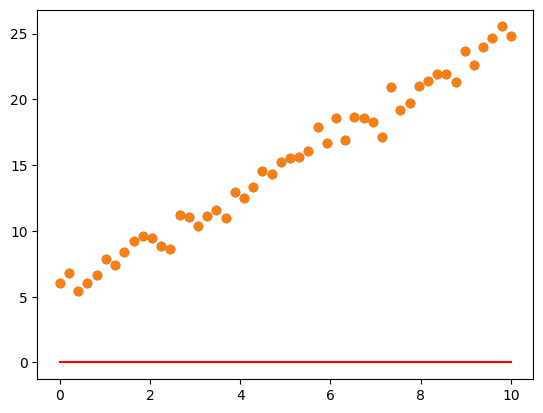

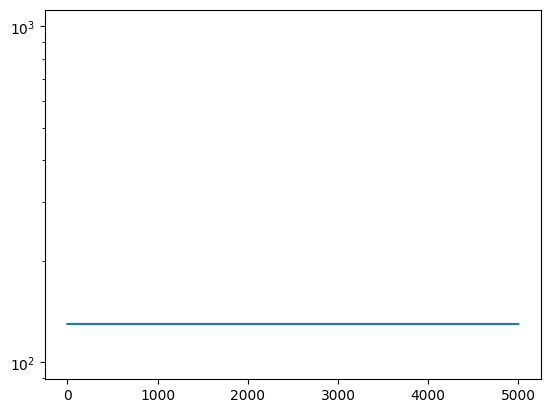

In [23]:
x=np.linspace(0.0,10,50)
y=2*x+5+0.4*np.random.normal(0,2,50)
nT=x.shape[0]
f_loss_1=[]

# Training
for epoch in range(epochs):
    # Prediction
    y_pred,a1,a2,a3,z1,z2=forward_propagation(x,w,b)

    # Cost function
    loss=mse(y_pred,y)
    f_loss_1.append(loss)
    
    # Backward Propagation (update weights)
    w,b=backwadrs_propagation(y_pred,y,w,b,a1,a2,a3,z1,z2,x,learning_rate,nT)


# data prediction
x_new=np.linspace(0.0,10,100)
y_pred_new,a1,a2,a3,z1,z2=forward_propagation(x_new,w,b)

plt.plot(x,y,'o')
plt.plot(x,y,'o',x_new,y_pred_new,'r-')
plt.show()
plt.semilogy(f_loss_1)